項目
1　データの読み込みと前処理
2　EDA
3　モデル構築と重要因子の特定
4　結論

#  1 データの読み込みと前処理

In [ ]:
"""
--------------------------------------------------------------------
ライブラリのインポート
--------------------------------------------------------------------
"""
!pip install shap
!pip install japanize_matplotlib

import pandas as pd
import numpy as np
import japanize_matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.inspection import PartialDependenceDisplay
import statsmodels.api as sm
import shap
import warnings
warnings.filterwarnings('ignore')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 16.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize_matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=647a329df42104a146258a8ff4f760b9b4036fbfa347ed5a8d41b1f311fc89d6
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize_matplotlib


In [ ]:
"""
--------------------------------------------------------------------
データの読み込み
--------------------------------------------------------------------
"""
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/IT/Data/フォルダ/medical_checkup (1).csv')
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


uid  visits_day  sex  \
0     3FA0D9F68DBB413C283862C8929213865F4395CEC41E8F...  2016-09-08  1.0   
1     2F602714DE8E8895F978C62F81DDD4F56473DF4E29CE99...  2016-09-06  1.0   
2     3E751CD96A5A2E9AA343587D4A0BFEDE5AE1B166A7E5FF...  2016-10-31  1.0   
3     FF5FAD56E9D0712C5897ED2DAC74B71DB363E3B0CF1F42...  2016-08-02  2.0   
4     E8F8B09A69CA64A5611F60D6A127A82B63F8C620F7C077...  2016-08-29  2.0   
...                                                 ...         ...  ...   
9995  41909908ECF4C2A64B42D32925A23B95B6AC958D770932...  2016-05-19  1.0   
9996  1A66E207D4722ED2BBF585F260F5B1924DF9EA4E226073...  2016-07-11  1.0   
9997  EB5DEF3A8DBE29965964709D0B9C10AA779D483EECF551...  2016-11-16  1.0   
9998  500313D078558077B7E41914F05A1DAB1E4C895F378025...  2016-04-08  2.0   
9999  3839542BD7D325C130ED4C8761E68ED84303A77BFFD573...  2016-04-25  2.0   

       age   bmi    ldl    hdl    sbp   dbp  a1c  history_of_cva_ihd  \
0     66.0  22.2  103.0   58.0  118.0  76.0  5.9                   0   
1     24.0  22.4   85.0   99.0  112.0  66.0  4.8                   0   
2     56.0  22.7  136.0   60.0  122.0  78.0  5.6                   0   
3     25.0  21.8   86.0   65.0  117.0  75.0  5.2                   0   
4     37.0  22.2  128.0   60.0  105.0  60.0  5.1                   0   
...    ...   ...    ...    ...    ...   ...  ...                 ...   
9995  49.0  20.9  114.0   73.0  107.0  76.0  NaN                   0   
9996  55.0  28.1  138.0   46.0  129.0  82.0  NaN                   0   
9997  48.0  21.3  121.0  109.0  132.0  94.0  5.3                   0   
9998  55.0  25.7  127.0   62.0  108.0  67.0  5.4                   1   
9999  59.0  17.2  133.0   91.0   93.0  44.0  5.5                   0   

      take_medicine  outcome  
0                 0        0  
1                 0        0  
2                 0        0  
3                 0        0  
4                 0        0  
...             ...      ...  
9995              0        0  
9996              1        0  
9997              0        0  
9998              0        0  
9999              0        0  

[10000 rows x 13 columns]

# 2　EDA（探索的データ分析）

In [ ]:
print("\n" + "="*70)
print("データの概略と欠損値の確認".center(70))
print("="*70 + "\n")

print("データの基本情報:")
print("-"*70)
df.info()
print("\n" + "-"*70)

print("\n欠損値の確認:")
print("-"*70)
print(df.isnull().sum())
print("\n" + "-"*70)

print("\n目的変数の発生頻度の確認:")
print("-"*70)
print(df['outcome'].value_counts())
print("\n" + "-"*70)

print("\n本データの統計量を確認:")
print("-"*70)
print(df.describe())
print("\n" + "-"*70)

# データ型の変換（扱いやすくするため）
df['visits_day'] = pd.to_datetime(df['visits_day'])
df['sex'] = df['sex'].astype('category')
df['history_of_cva_ihd'] = df['history_of_cva_ihd'].astype('category')
df['take_medicine'] = df['take_medicine'].astype('category')
df['outcome'] = df['outcome'].astype('category')

# 新しい特徴量の追加(追々、使用するため)
df['bmi_squared'] = (df['bmi'] - 22) ** 2

print("データ型変換後の基本情報:")
print("-"*70)
df.info()
print("\n" + "-"*70)


                            データの概略と欠損値の確認                             

データの基本情報:
----------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   uid                 10000 non-null  object 
 1   visits_day          10000 non-null  object 
 2   sex                 10000 non-null  float64
 3   age                 10000 non-null  float64
 4   bmi                 9995 non-null   float64
 5   ldl                 9961 non-null   float64
 6   hdl                 9961 non-null   float64
 7   sbp                 9998 non-null   float64
 8   dbp                 9998 non-null   float64
 9   a1c                 7940 non-null   float64
 10  history_of_cva_ihd  10000 non-null  int64  
 11  take_medicine       10000 non-null  int64  
 12  outcome             10000 non-null  int64  
dty

上記の結果から、ヘモグロビンA1cにて欠損値が多く、確認された。その他の変数でも少量ではあるが、欠損値が確認され、どのように対処するか検討していく。（ヘモグロビンALcが目的変数への影響度が低いと判断すれば、削除することも検討する。他の変数に関しても、目的変数との関係性を鑑みて処理を検討する。また、今後モデル構築の精度向上に向けて、新しい特徴量を追加している。後で説明予定。）

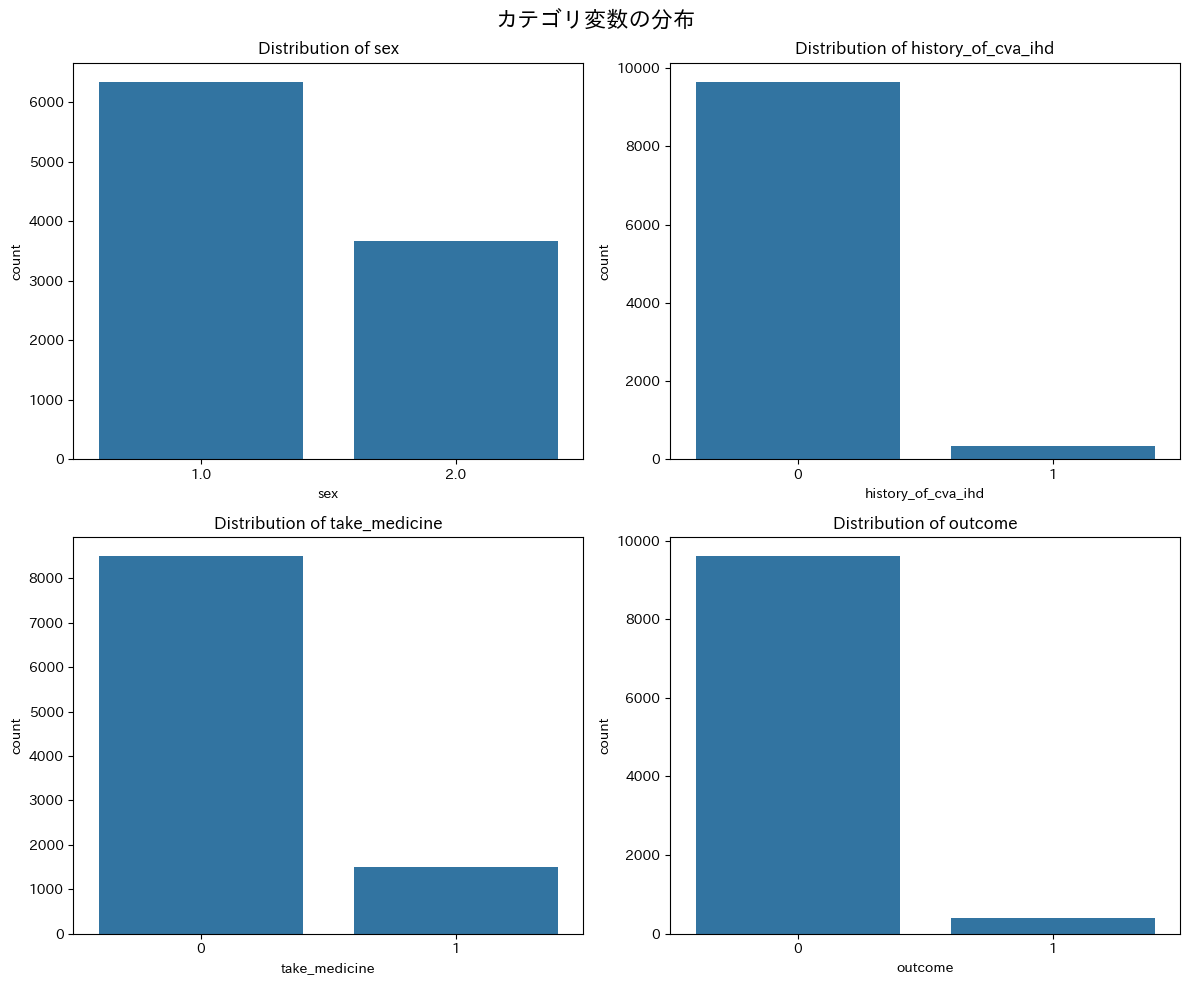

In [ ]:
# カテゴリ変数のリスト
cat_vars = ['sex', 'history_of_cva_ihd', 'take_medicine', 'outcome']

# 2x2のサブプロットを作成
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('カテゴリ変数の分布', fontsize=16)

# 各カテゴリ変数のカウントプロットを作成
for var, ax in zip(cat_vars, axes.flatten()):
    sns.countplot(x=var, data=df, ax=ax)
    ax.set_title(f'Distribution of {var}')

plt.tight_layout()
plt.show()






                               数値変数の分布                                



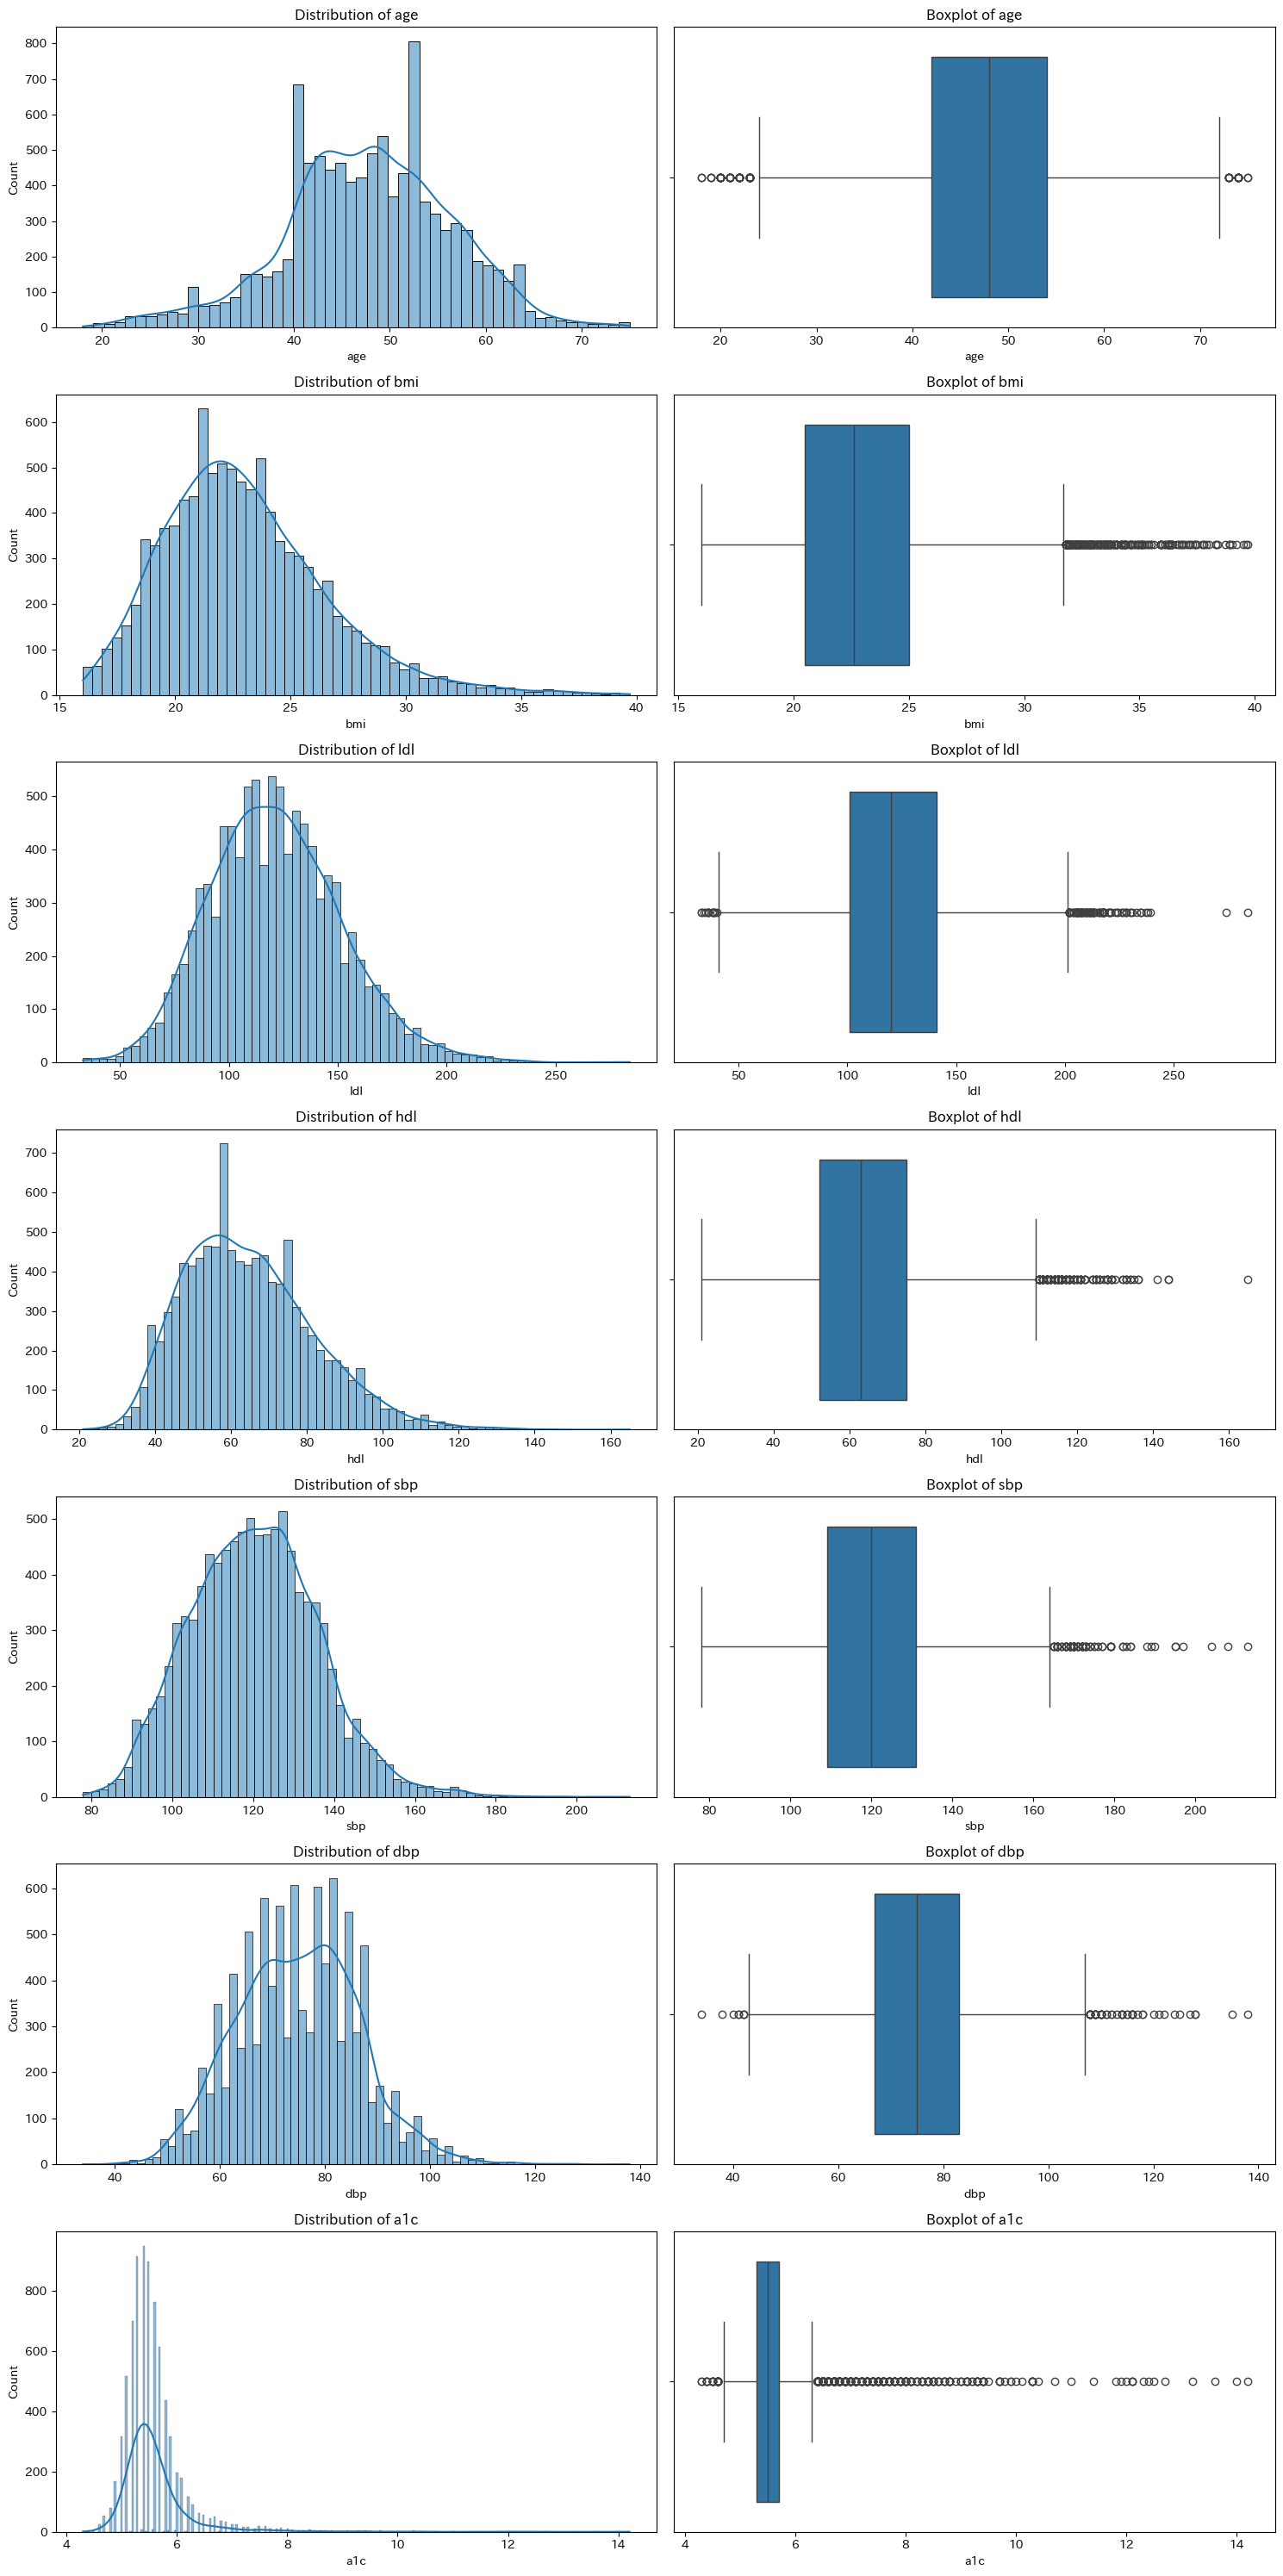

In [ ]:
print("\n" + "="*70)
print("数値変数の分布".center(70))
print("="*70 + "\n")


# 数値変数の分布（ヒストグラムと箱ひげ図）
num_cols = ['age', 'bmi', 'ldl', 'hdl', 'sbp', 'dbp', 'a1c']
fig, axes = plt.subplots(len(num_cols), 2, figsize=(15, 30))

for i, col in enumerate(num_cols):
    # ヒストグラム
    sns.histplot(data=df, x=col, kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Distribution of {col}')

    # 箱ひげ図
    sns.boxplot(data=df, x=col, ax=axes[i, 1])
    axes[i, 1].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

今回、目的変数である「Outcome」の1（発症した）と0（発症していない）を比較したく、加えて発症した方はデータとして400程度しかないため、説明変数との関係性を分布に表示させ、仮説を立てやすくする。


                          Outcome＝1　説明変数の分布                           

              age         bmi         ldl         hdl         sbp         dbp  \
count  392.000000  391.000000  389.000000  389.000000  392.000000  392.000000   
mean    52.153061   24.139130  124.588689   62.557841  126.936224   79.316327   
std      7.455034    3.894293   33.230924   17.889405   16.984076   12.462401   
min     28.000000   16.000000   33.000000   26.000000   89.000000   43.000000   
25%     47.000000   21.250000  101.000000   49.000000  114.750000   71.000000   
50%     53.000000   23.600000  124.000000   60.000000  126.000000   80.000000   
75%     58.000000   26.600000  146.000000   74.000000  138.000000   86.000000   
max     74.000000   37.100000  235.000000  127.000000  208.000000  138.000000   

              a1c  
count  325.000000  
mean     5.833265  
std      0.901661  
min      4.500000  
25%      5.300000  
50%      5.600000  
75%      6.000000  
max     13.200000  


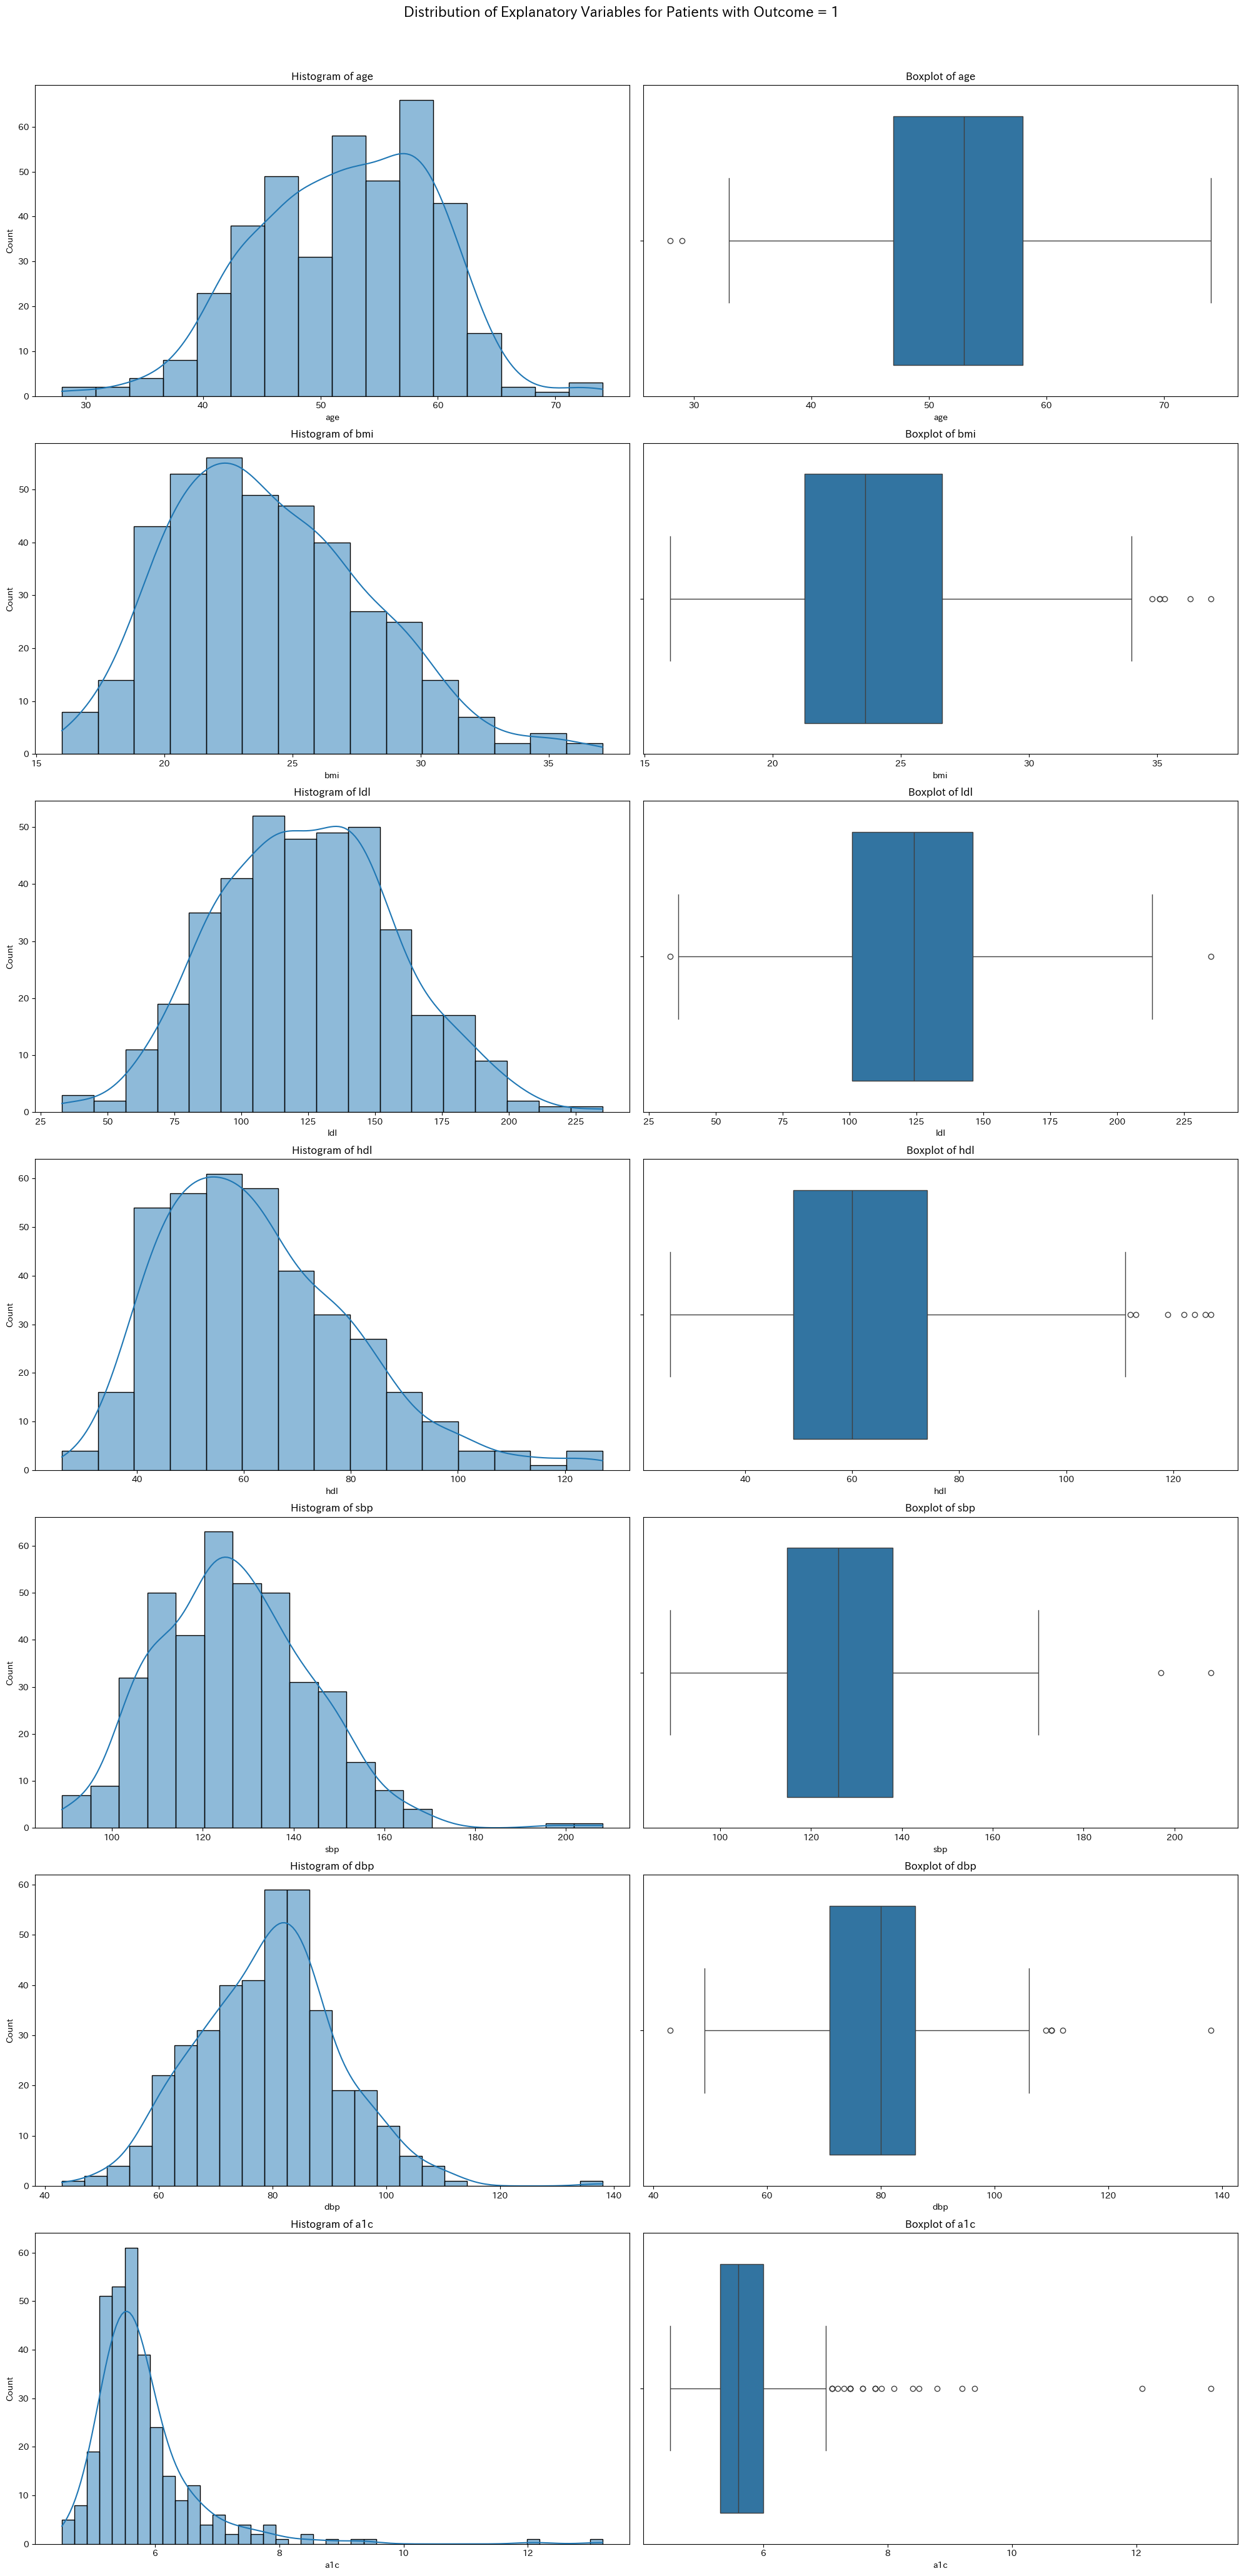

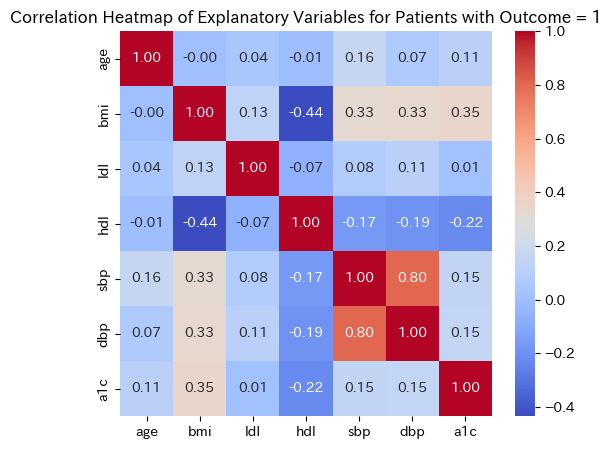

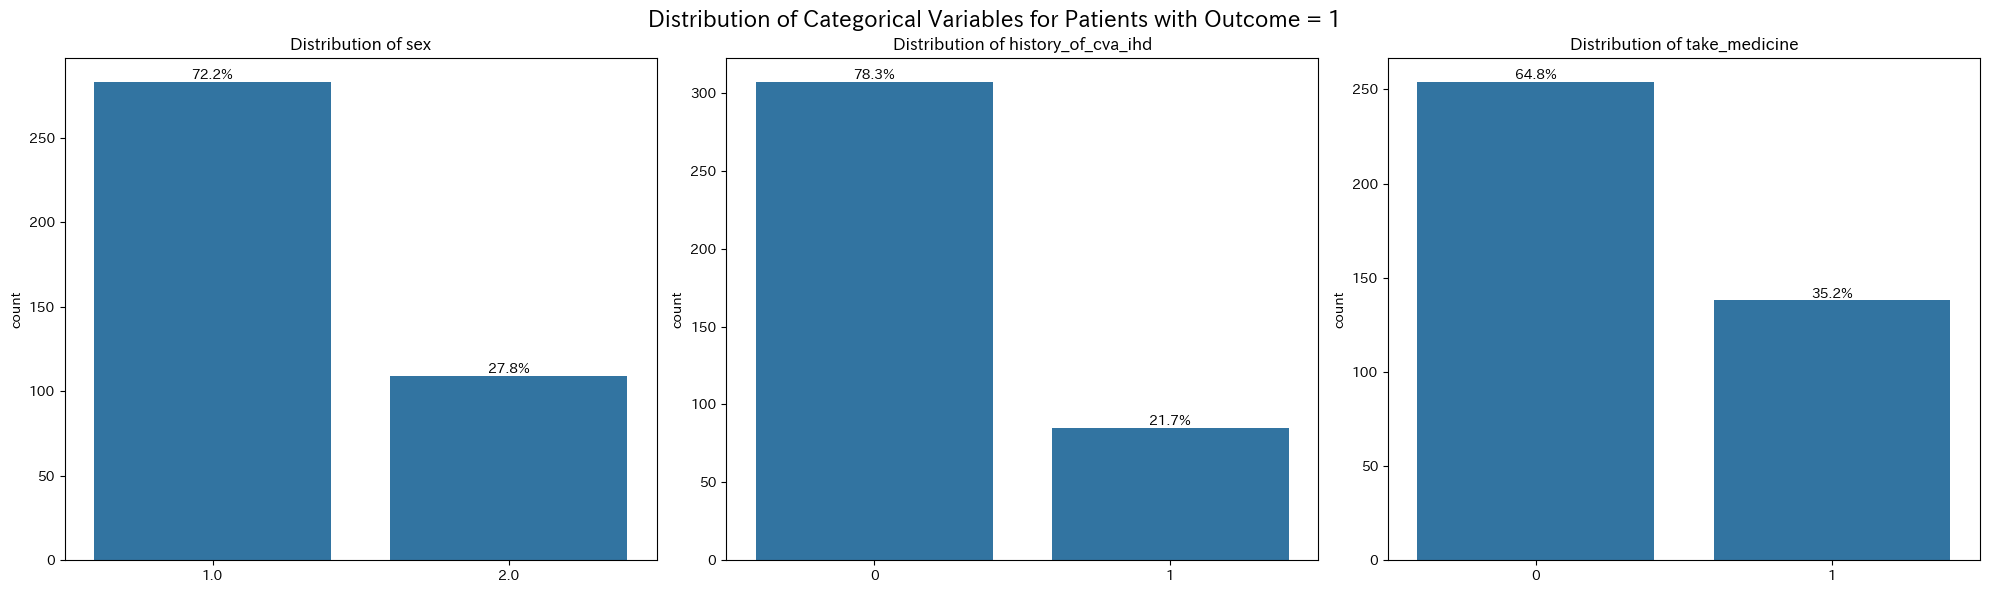

In [ ]:
print("\n" + "="*70)
print("Outcome＝1　説明変数の分布".center(70))
print("="*70 + "\n")

# Outcomeが1である患者のデータを抽出
df_outcome_1 = df[df['outcome'] == 1].copy()

# 説明変数のリスト
explanatory_vars = ['age', 'bmi', 'ldl', 'hdl', 'sbp', 'dbp', 'a1c']

# 説明変数のみのDataFrameを作成
df_explanatory = df_outcome_1[explanatory_vars]

# 基本統計量の表示
print(df_explanatory.describe())

# データ分布の可視化
fig, axes = plt.subplots(len(explanatory_vars), 2, figsize=(20, 6*len(explanatory_vars)))
fig.suptitle('Distribution of Explanatory Variables for Patients with Outcome = 1', fontsize=16)

for i, var in enumerate(explanatory_vars):
    # ヒストグラム
    sns.histplot(data=df_explanatory, x=var, kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Histogram of {var}')

    # 箱ひげ図
    sns.boxplot(data=df_explanatory, x=var, ax=axes[i, 1])
    axes[i, 1].set_title(f'Boxplot of {var}')

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

# 相関行列のヒートマップ
plt.figure(figsize=(6, 5))
sns.heatmap(df_explanatory.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Explanatory Variables for Patients with Outcome = 1')
plt.show()

# カテゴリカル変数の分布
categorical_vars = ['sex', 'history_of_cva_ihd', 'take_medicine']

fig, axes = plt.subplots(1, len(categorical_vars), figsize=(20, 6))
fig.suptitle('Distribution of Categorical Variables for Patients with Outcome = 1', fontsize=16)

for i, var in enumerate(categorical_vars):
    sns.countplot(data=df_outcome_1, x=var, ax=axes[i])
    axes[i].set_title(f'Distribution of {var}')
    axes[i].set_xlabel('')

    # パーセンテージの表示
    total = len(df_outcome_1[var])
    for p in axes[i].patches:
        percentage = f'{100 * p.get_height() / total:.1f}%'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        axes[i].annotate(percentage, (x, y), ha='center', va='bottom')

plt.tight_layout()
plt.subplots_adjust(top=0.90)  # タイトルとプロットの間隔を調整
plt.show()


                       Outcome＝0 or 1　説明変数の分布比較                       



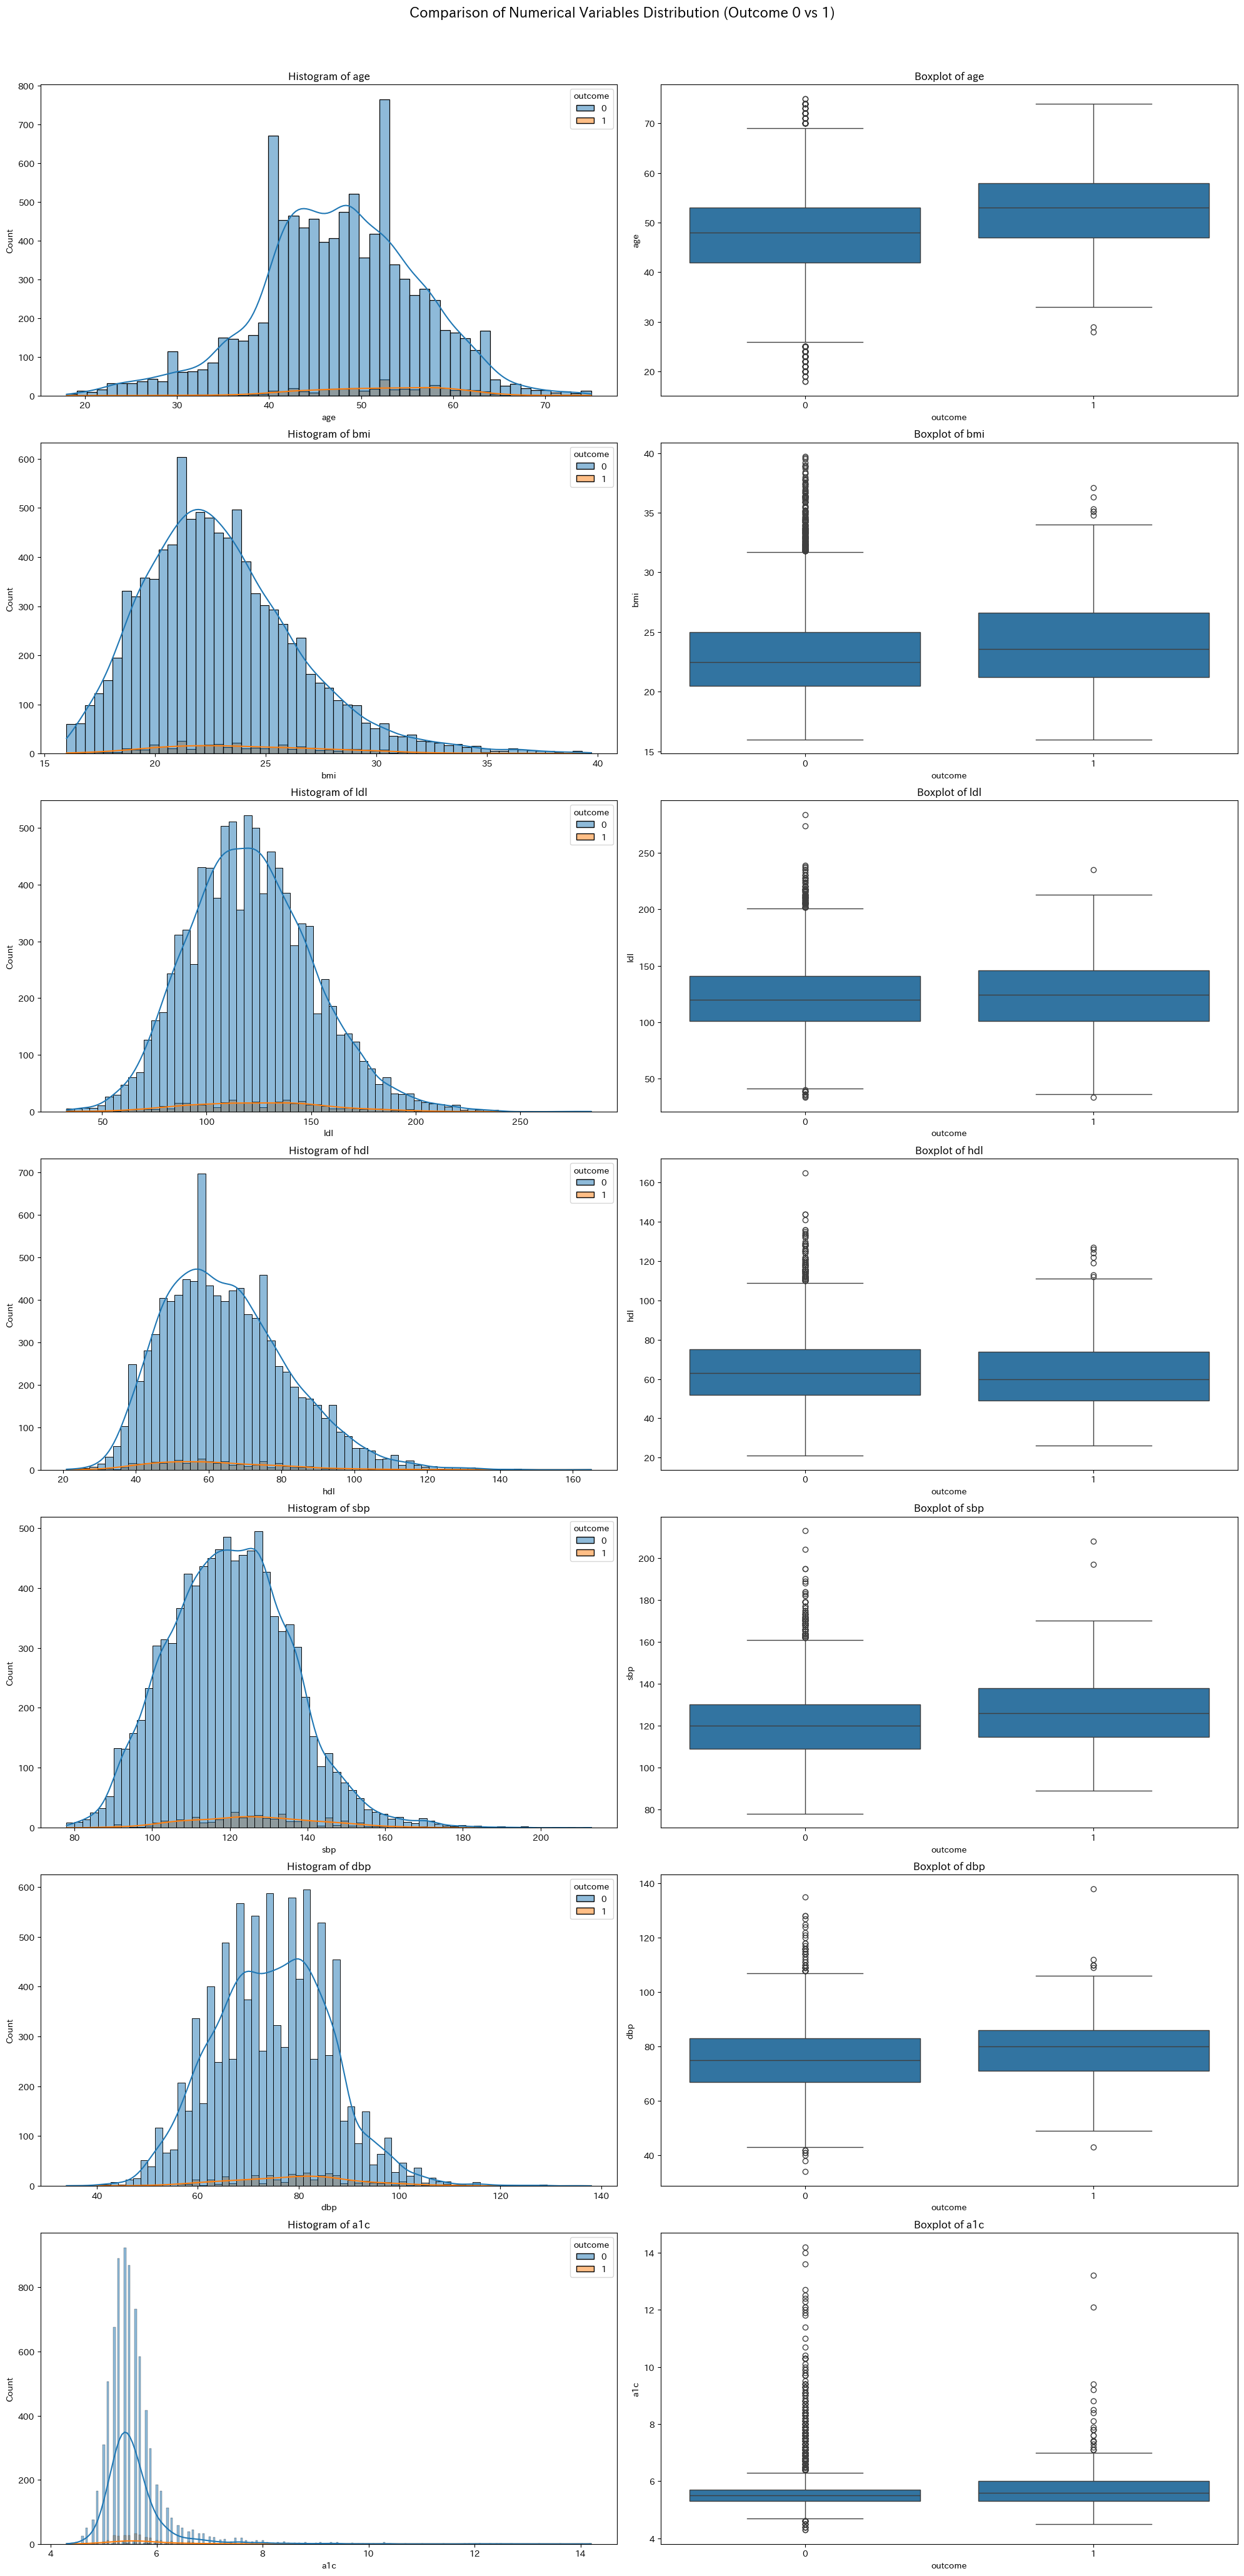

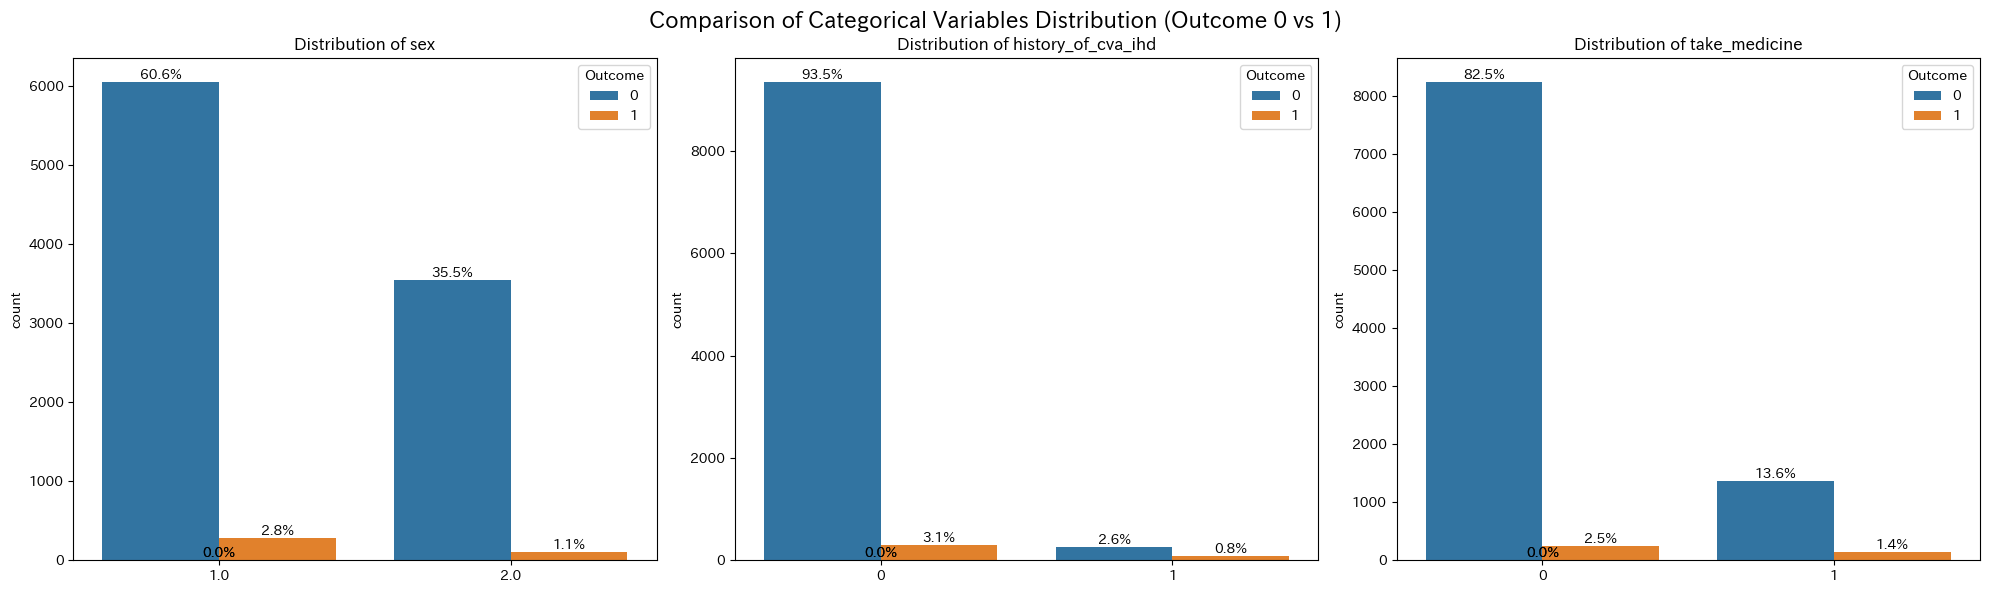

In [ ]:
print("\n" + "="*70)
print("Outcome＝0 or 1　説明変数の分布比較".center(70))
print("="*70 + "\n")


# Outcomeが0と1の患者のデータを分割
df_outcome_0 = df[df['outcome'] == 0]
df_outcome_1 = df[df['outcome'] == 1]

# 説明変数のリスト
numerical_vars = ['age', 'bmi', 'ldl', 'hdl', 'sbp', 'dbp', 'a1c']
categorical_vars = ['sex', 'history_of_cva_ihd', 'take_medicine']

# 数値型変数の分布比較
fig, axes = plt.subplots(len(numerical_vars), 2, figsize=(20, 6*len(numerical_vars)))
fig.suptitle('Comparison of Numerical Variables Distribution (Outcome 0 vs 1)', fontsize=16)

for i, var in enumerate(numerical_vars):
    # ヒストグラム
    sns.histplot(data=df, x=var, hue='outcome', kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Histogram of {var}')

    # 箱ひげ図
    sns.boxplot(data=df, x='outcome', y=var, ax=axes[i, 1])
    axes[i, 1].set_title(f'Boxplot of {var}')

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

# カテゴリカル変数の分布比較
fig, axes = plt.subplots(1, len(categorical_vars), figsize=(20, 6))
fig.suptitle('Comparison of Categorical Variables Distribution (Outcome 0 vs 1)', fontsize=16)

for i, var in enumerate(categorical_vars):
    sns.countplot(data=df, x=var, hue='outcome', ax=axes[i])
    axes[i].set_title(f'Distribution of {var}')
    axes[i].set_xlabel('')
    axes[i].legend(title='Outcome')

    # パーセンテージの表示
    total = len(df[var])
    for p in axes[i].patches:
        percentage = f'{100 * p.get_height() / total:.1f}%'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        axes[i].annotate(percentage, (x, y), ha='center', va='bottom')

plt.tight_layout()
plt.subplots_adjust(top=0.90)
plt.show()

上記の内容から、ヒストグラムから各変数が異常な分布ではないこと、また、箱ひげ図からOutcomeの'0'と'1'で異常な差がないと判断した。
そのため、欠損値を中央値で補完しても、この後の解析に影響はないと判断した。
(ヘモグロビンALcの欠損値が多いことを加味して、変数から削除してもよいが、今回の目的である病気に対して影響を及ぼす可能性が少なからずあり、医療的な知識を持ち合わせていないことから、一旦中央値で補完し、進めることとした。)


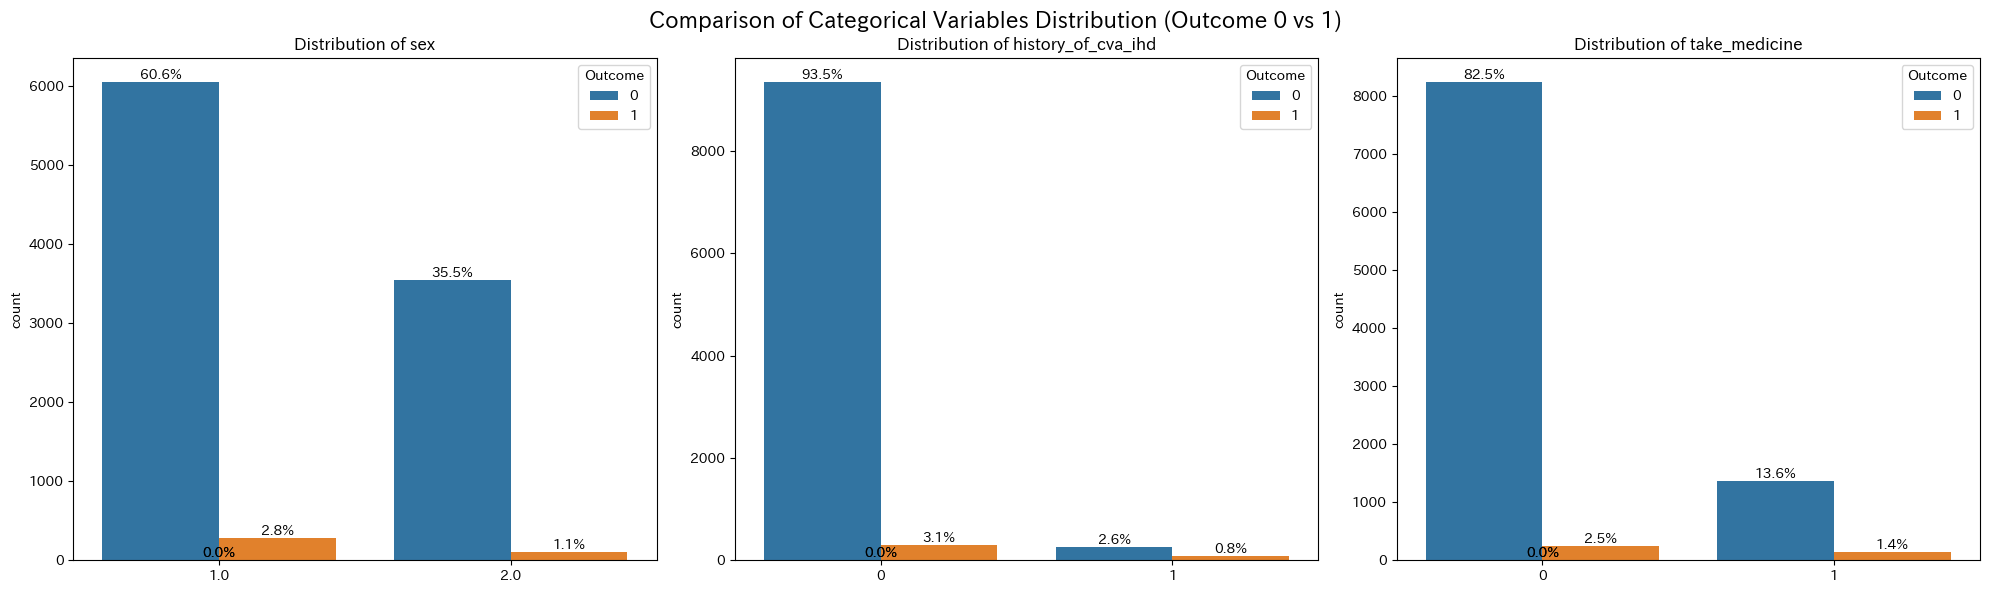

In [ ]:
# カテゴリカル変数の分布比較
fig, axes = plt.subplots(1, len(categorical_vars), figsize=(20, 6))
fig.suptitle('Comparison of Categorical Variables Distribution (Outcome 0 vs 1)', fontsize=16)

for i, var in enumerate(categorical_vars):
    sns.countplot(data=df, x=var, hue='outcome', ax=axes[i])
    axes[i].set_title(f'Distribution of {var}')
    axes[i].set_xlabel('')
    axes[i].legend(title='Outcome')

    # パーセンテージの表示
    total = len(df[var])
    for p in axes[i].patches:
        percentage = f'{100 * p.get_height() / total:.1f}%'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        axes[i].annotate( percentage, (x, y), ha='center', va='bottom')

plt.tight_layout()
plt.subplots_adjust(top=0.90)
plt.show()


                          欠損値の補完と補完後の分布の最終確認                          



<Figure size 1200x1000 with 0 Axes>

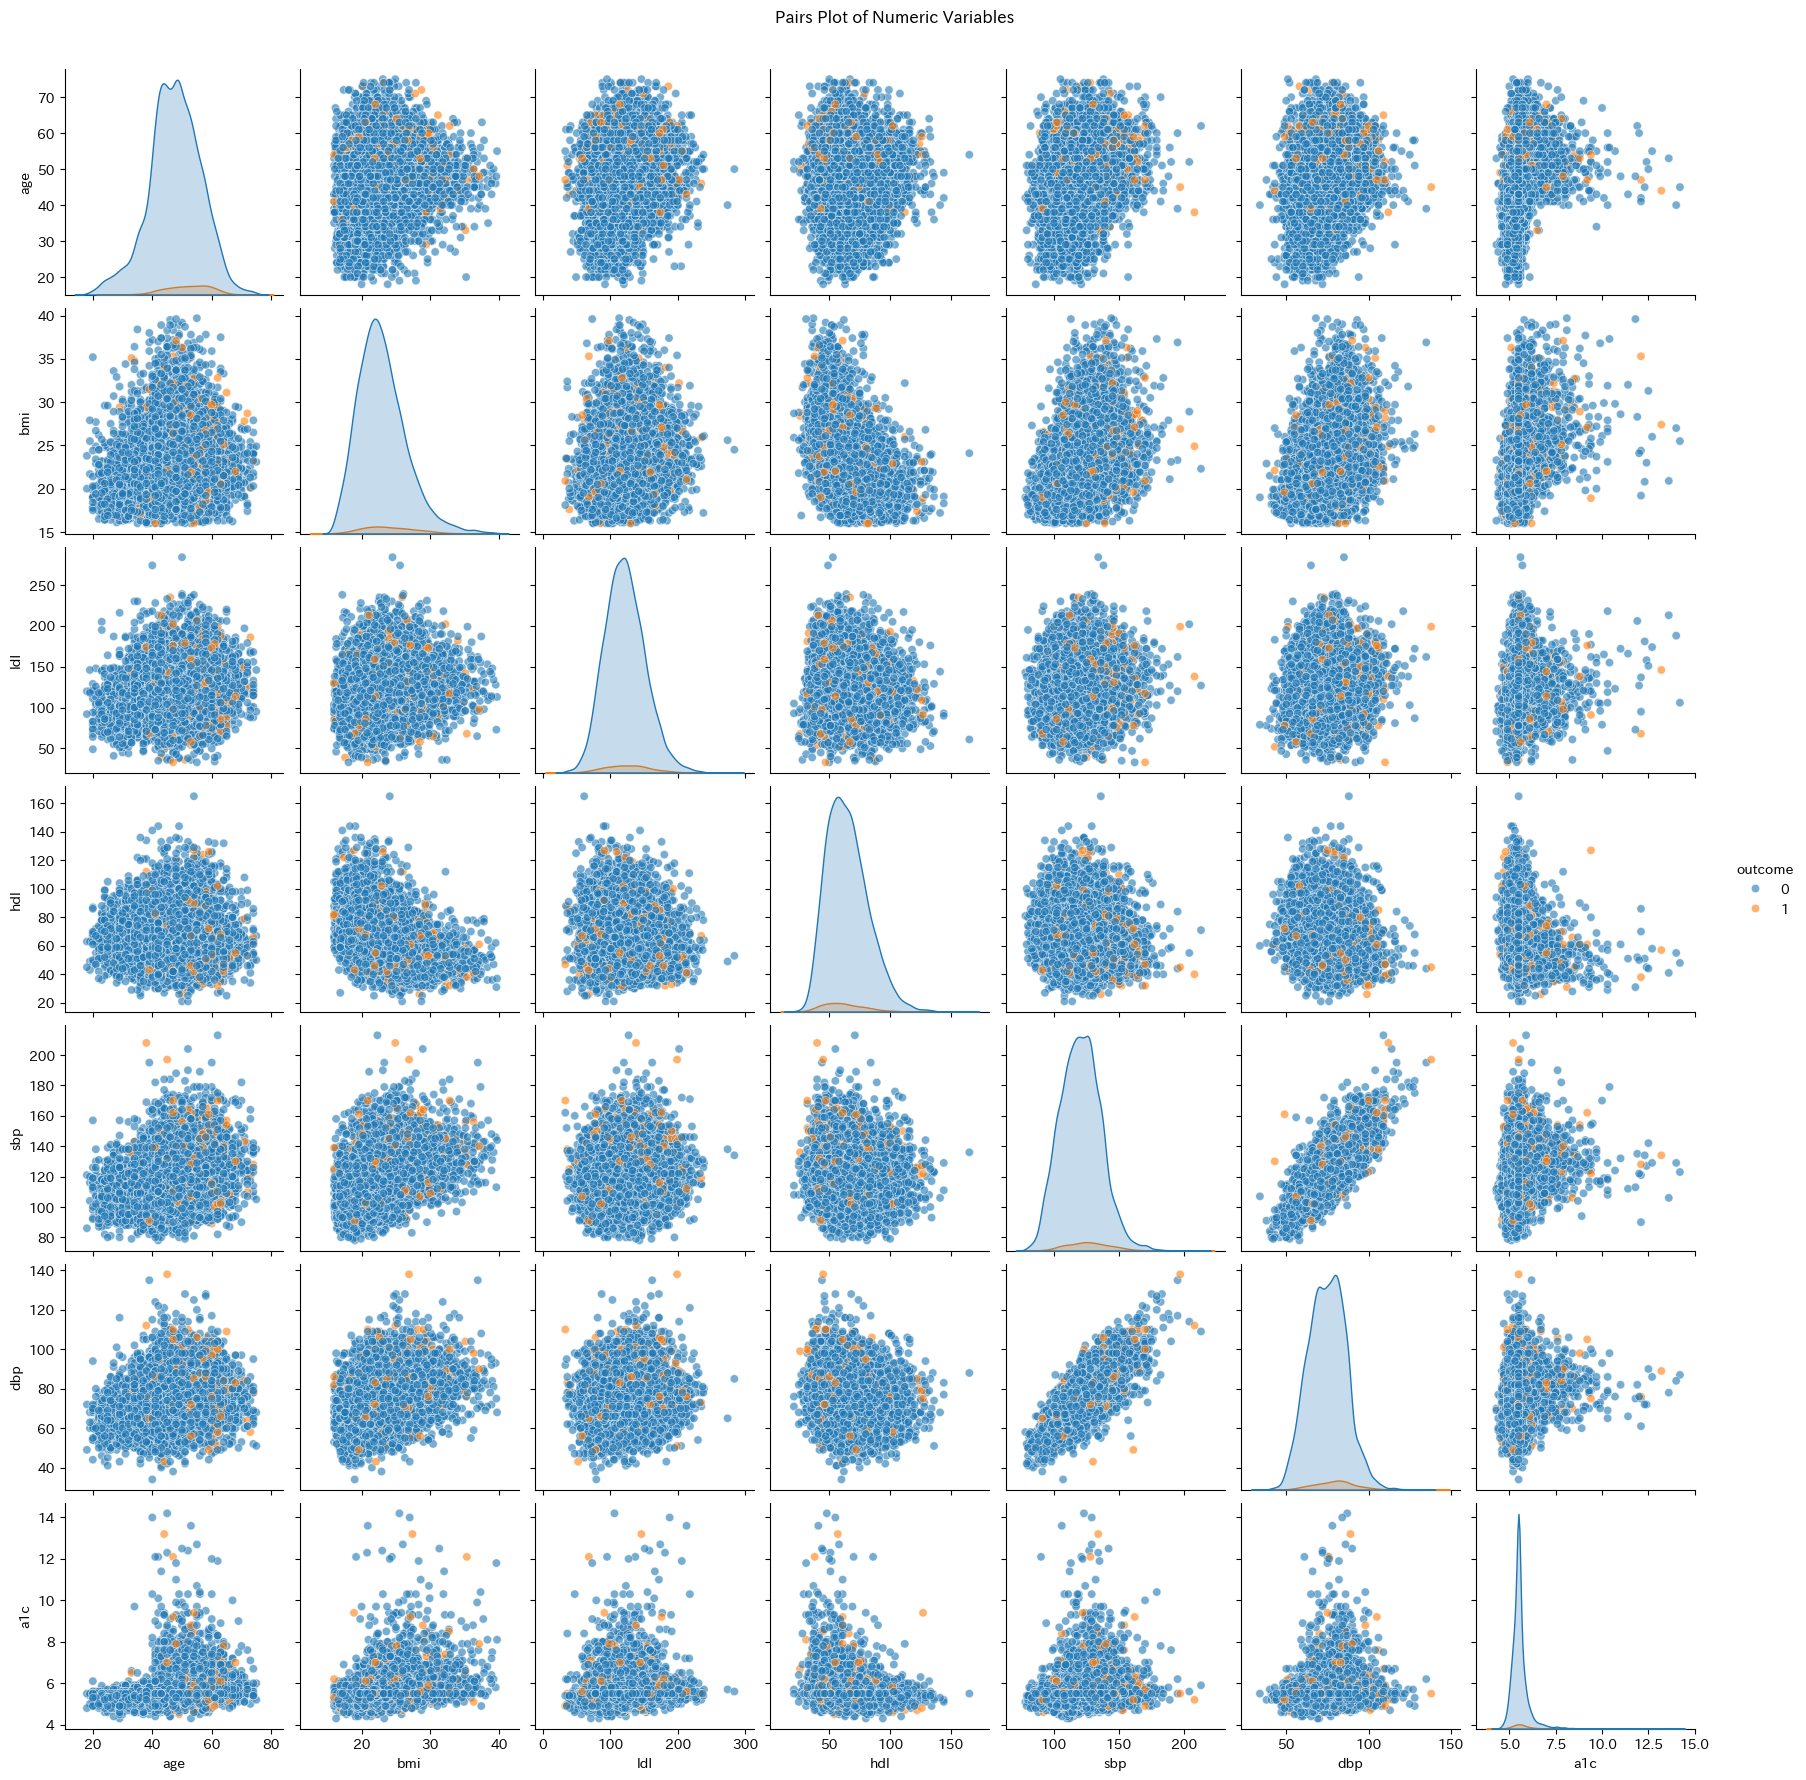

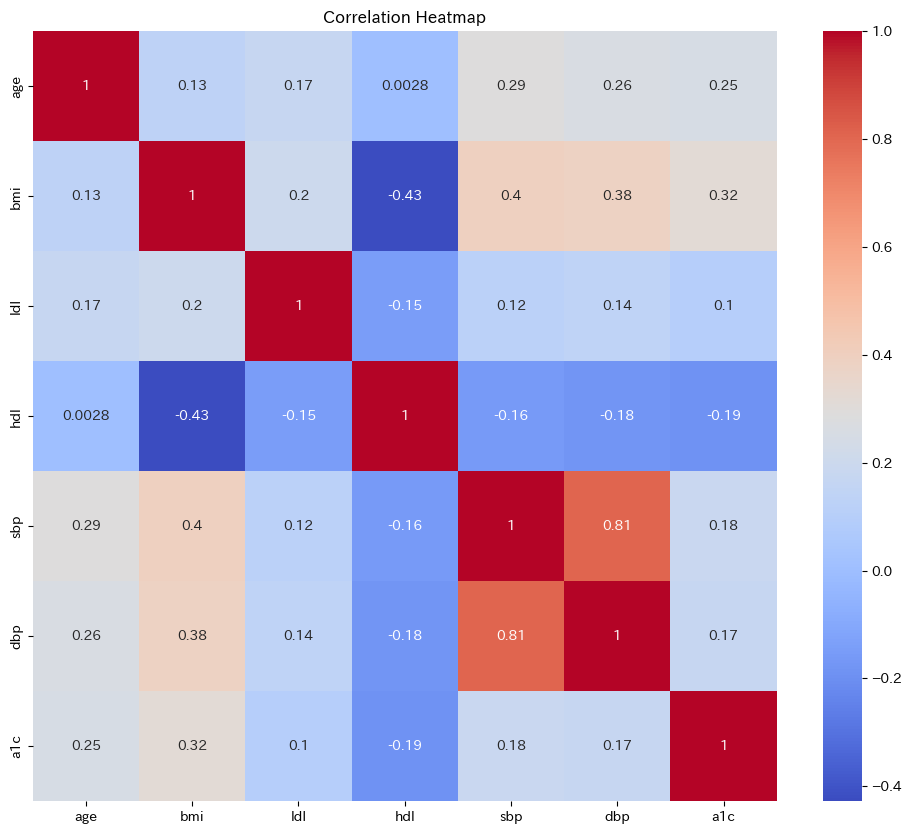

In [ ]:
print("\n" + "="*70)
print("欠損値の補完と補完後の分布の最終確認".center(70))
print("="*70 + "\n")

#欠損値を補完
numeric_columns = ['bmi', 'ldl', 'hdl', 'sbp', 'dbp', 'a1c', 'bmi_squared']
for col in numeric_columns:
    df[col].fillna(df[col].median(), inplace=True)

# 数値型変数の選択
numeric_vars = ['age', 'bmi', 'ldl', 'hdl', 'sbp', 'dbp', 'a1c']

# Pairsプロットの作成
plt.figure(figsize=(12, 10))
sns.pairplot(df[numeric_vars + ['outcome']],
             hue='outcome',
             diag_kind='kde',
             plot_kws={'alpha': 0.6})
plt.suptitle('Pairs Plot of Numeric Variables', y=1.02)
plt.show()

# 相関行列のヒートマップ
plt.figure(figsize=(12, 10))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## 多重共線性が疑われるsbpとdbpに関して、どちらかを削除する。判断するために、Outcomeに対して、どちらが高い相関係数を持っているか確認し、低い方を削除する。


                            全ての説明変数同士の相関係数                            



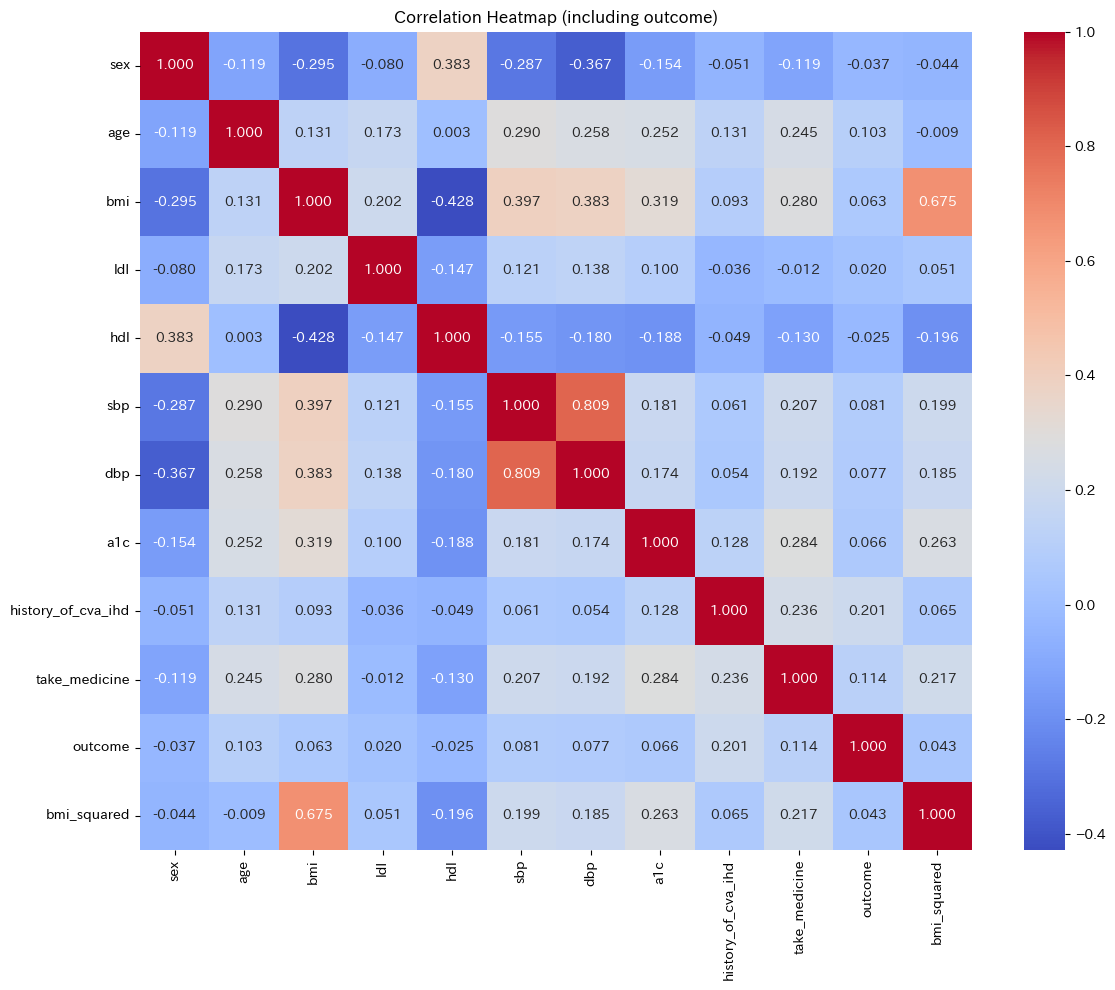

In [ ]:
print("\n" + "="*70)
print("全ての説明変数同士の相関係数".center(70))
print("="*70 + "\n")

# 数値型の列とoutcomeを選択
cols_for_corr = df.select_dtypes(include=['int64', 'float64', 'category']).columns

# 相関行列の計算と可視化
plt.figure(figsize=(12, 10))
sns.heatmap(df[cols_for_corr].corr(), annot=True, cmap='coolwarm', fmt='.3f')
plt.title('Correlation Heatmap (including outcome)')
plt.tight_layout()
plt.show()

多重共線性が疑われるsbpとdbpについて、
outcomeとの直接的な関係性を鑑みると、dbpの影響度が小さいと判断でき削除する。

## 3　モデル構築と重要因子の特定
## 3-1　ロジスティック回帰


In [ ]:
print("\n" + "="*70)
print("ロジスティック回帰のモデル構築".center(70))
print("="*70 + "\n")



# データの準備
X = df[['age', 'bmi', 'ldl', 'hdl', 'sbp', 'a1c', 'sex', 'history_of_cva_ihd', 'take_medicine']]
y = df['outcome']

# カテゴリカル変数のダミー変数化
X = pd.get_dummies(X, columns=['sex', 'history_of_cva_ihd', 'take_medicine'], drop_first=True)

# 標準化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# statsmodelsを使用したロジスティック回帰
X_with_const = sm.add_constant(X_scaled)
model = sm.Logit(y, X_with_const)
results = model.fit()

print(results.summary())

# オッズ比の計算
odds_ratios = np.exp(results.params)
conf_int = np.exp(results.conf_int())
summary_df = pd.DataFrame({
    'Odds Ratio': odds_ratios,
    'Lower CI': conf_int[0],
    'Upper CI': conf_int[1]
})
print(summary_df)


                           ロジスティック回帰のモデル構築                            

Optimization terminated successfully.
         Current function value: 0.149716
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                outcome   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9990
Method:                           MLE   Df Model:                            9
Date:                Sat, 24 Aug 2024   Pseudo R-squ.:                 0.09479
Time:                        05:40:14   Log-Likelihood:                -1497.2
converged:                       True   LL-Null:                       -1653.9
Covariance Type:            nonrobust   LLR p-value:                 3.481e-62
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.4922      0.064   

結果から
1　Age
8　脳血管疾患または虚血性心疾患の既往歴
5　sbp
9　薬の服用
が要因と考えられる。

統計的有意性:
モデル全体のp値（LLR p-value）が非常に小さい（3.481e-62）ことから、モデルは統計的に有意と判断できる。

一方で、モデルの適合度を示す値：Pseudo R-squ.:0.09479と低いことから、信頼性に欠ける結果となっている。


ロジスティック回帰の課題として、共変性や非線形の特徴量をとらえきれないという欠点である。そこで、BMIと医療リスクに二次関数の関係性がある

## 3.2　ロジスティック回帰を（BMI二次関数化）

In [ ]:
print("\n" + "="*70)
print("ロジスティック回帰のモデル構築（BMI変更）".center(70))
print("="*70 + "\n")



# データの準備
X = df[['age', 'bmi_squared', 'ldl', 'hdl', 'sbp', 'a1c', 'sex', 'history_of_cva_ihd', 'take_medicine']]
y = df['outcome']

# カテゴリカル変数のダミー変数化
X = pd.get_dummies(X, columns=['sex', 'history_of_cva_ihd', 'take_medicine'], drop_first=True)

# 標準化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# statsmodelsを使用したロジスティック回帰
X_with_const = sm.add_constant(X_scaled)
model = sm.Logit(y, X_with_const)
results = model.fit()

print(results.summary())

# オッズ比の計算
odds_ratios = np.exp(results.params)
conf_int = np.exp(results.conf_int())
summary_df = pd.DataFrame({
    'Odds Ratio': odds_ratios,
    'Lower CI': conf_int[0],
    'Upper CI': conf_int[1]
})
print(summary_df)


                        ロジスティック回帰のモデル構築（BMI変更）                        

Optimization terminated successfully.
         Current function value: 0.149697
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                outcome   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9990
Method:                           MLE   Df Model:                            9
Date:                Sat, 24 Aug 2024   Pseudo R-squ.:                 0.09490
Time:                        05:40:14   Log-Likelihood:                -1497.0
converged:                       True   LL-Null:                       -1653.9
Covariance Type:            nonrobust   LLR p-value:                 2.902e-62
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.4913      0.064   

### ロジスティック回帰の適応度が低いため、適応度を上げるために、目的変数への影響が小さい説明変数を取り除くこととした。
上記の結果から、取り除く説明変数はbmi,hdl,a1c,sexとする。

## 3.3　ロジスティクス回帰（説明変数の選定）

In [ ]:

# データの準備
X = df[['age',  'ldl', 'sbp', 'history_of_cva_ihd', 'take_medicine']]
y = df['outcome']

# カテゴリカル変数のダミー変数化
X = pd.get_dummies(X, columns=['history_of_cva_ihd', 'take_medicine'], drop_first=True)

# 標準化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# statsmodelsを使用したロジスティック回帰
X_with_const = sm.add_constant(X_scaled)
model = sm.Logit(y, X_with_const)
results = model.fit()

print(results.summary())

# オッズ比の計算
odds_ratios = np.exp(results.params)
conf_int = np.exp(results.conf_int())
summary_df = pd.DataFrame({
    'Odds Ratio': odds_ratios,
    'Lower CI': conf_int[0],
    'Upper CI': conf_int[1]
})
print(summary_df)

Optimization terminated successfully.
         Current function value: 0.149844
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                outcome   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9994
Method:                           MLE   Df Model:                            5
Date:                Sat, 24 Aug 2024   Pseudo R-squ.:                 0.09401
Time:                        05:47:06   Log-Likelihood:                -1498.4
converged:                       True   LL-Null:                       -1653.9
Covariance Type:            nonrobust   LLR p-value:                 4.364e-65
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.4845      0.063    -55.063      0.000      -3.609      -3.360
x1             0.3440      0.

## 適応度の低さは継続したままであったため、別の手法にて原因を特定するように考察した。

## 3.4　ランダムフォレスト


                            ランダムフォレストモデル構築                            

                feature  importance
2                   ldl    0.181375
1                   bmi    0.181299
3                   hdl    0.161576
4                   sbp    0.155319
0                   age    0.126181
5                   a1c    0.120476
7  history_of_cva_ihd_1    0.037884
6               sex_2.0    0.020767
8       take_medicine_1    0.015123


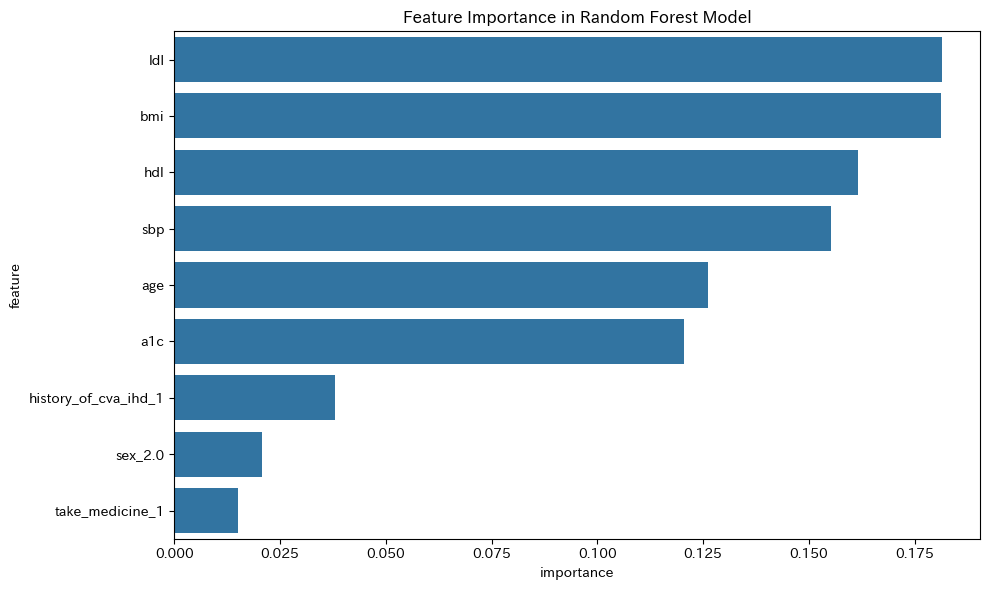


Permutation Importance:
                feature  importance       std
0                   age     0.03137  0.000261
2                   ldl     0.02959  0.000791
4                   sbp     0.02952  0.000379
1                   bmi     0.02920  0.000379
3                   hdl     0.02634  0.000674
5                   a1c     0.02448  0.000565
8       take_medicine_1     0.01236  0.000806
7  history_of_cva_ihd_1     0.00960  0.000420
6               sex_2.0     0.00811  0.000907


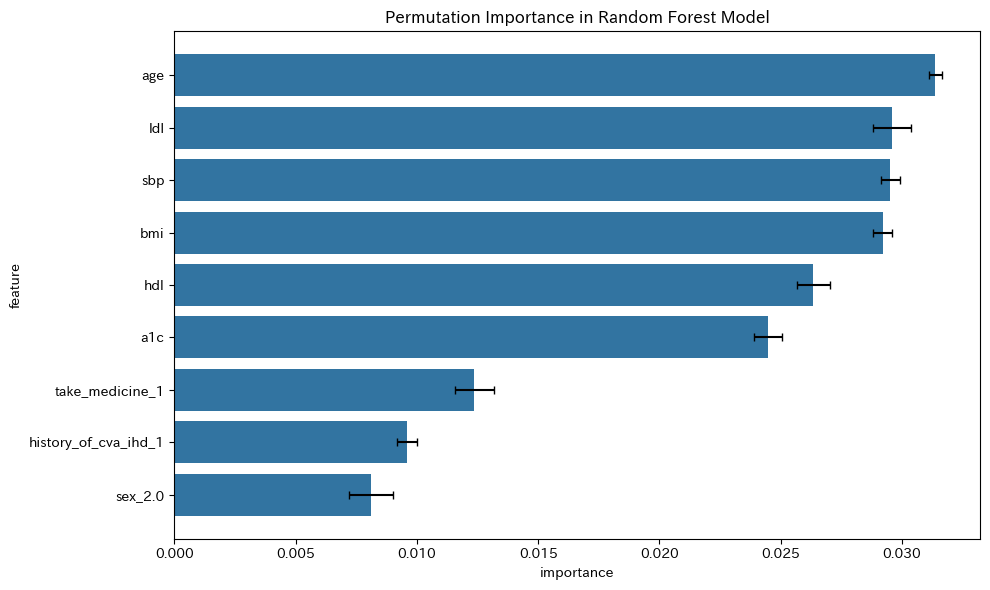

In [ ]:
print("\n" + "="*70)
print("ランダムフォレストモデル構築".center(70))
print("="*70 + "\n")


# データの読み込み
X = df[['age', 'bmi', 'ldl', 'hdl', 'sbp', 'a1c', 'sex', 'history_of_cva_ihd', 'take_medicine']]
y = df['outcome']

# カテゴリカル変数のダミー変数化
X = pd.get_dummies(X, columns=['sex', 'history_of_cva_ihd', 'take_medicine'], drop_first=True)

# ランダムフォレストモデルの構築
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# 特徴量の重要度を取得
importances = rf.feature_importances_
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': importances})
feature_importance = feature_importance.sort_values('importance', ascending=False)

# 特徴量の重要度を表示
print(feature_importance)

# 特徴量の重要度を可視化
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance in Random Forest Model')
plt.tight_layout()
plt.show()



# パーミュテーション重要度の計算
perm_importance = permutation_importance(rf, X, y, n_repeats=10, random_state=42)
perm_importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': perm_importance.importances_mean,
    'std': perm_importance.importances_std
}).sort_values('importance', ascending=False)

print("\nPermutation Importance:")
print(perm_importance_df)

# パーミュテーション重要度の可視化（修正版）
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='importance', y='feature', data=perm_importance_df)

# エラーバーを追加
xerr = perm_importance_df['std']
ax.errorbar(x=perm_importance_df['importance'], y=range(len(perm_importance_df)),
            xerr=xerr, fmt='none', c='black', capsize=3)

plt.title('Permutation Importance in Random Forest Model')
plt.tight_layout()
plt.show()


                            SHAP値の算出および可視化                            

Shape of shap_values: (10000, 9, 2)
Shape of shap_values_class1: (10000, 9)


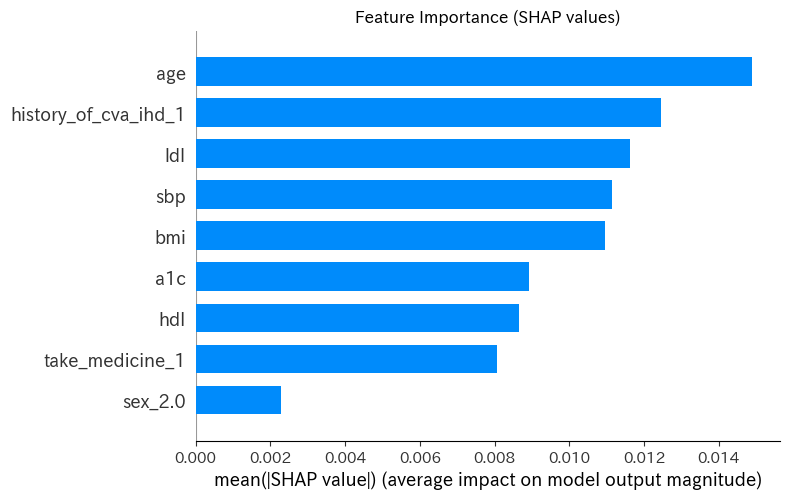

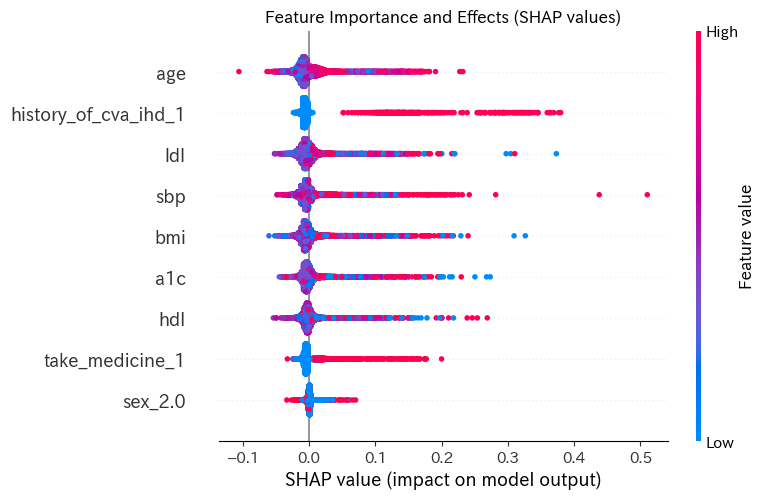

                feature  importance
0                   age    0.014893
7  history_of_cva_ihd_1    0.012455
2                   ldl    0.011620
4                   sbp    0.011151
1                   bmi    0.010964
5                   a1c    0.008921
3                   hdl    0.008646
8       take_medicine_1    0.008068
6               sex_2.0    0.002298


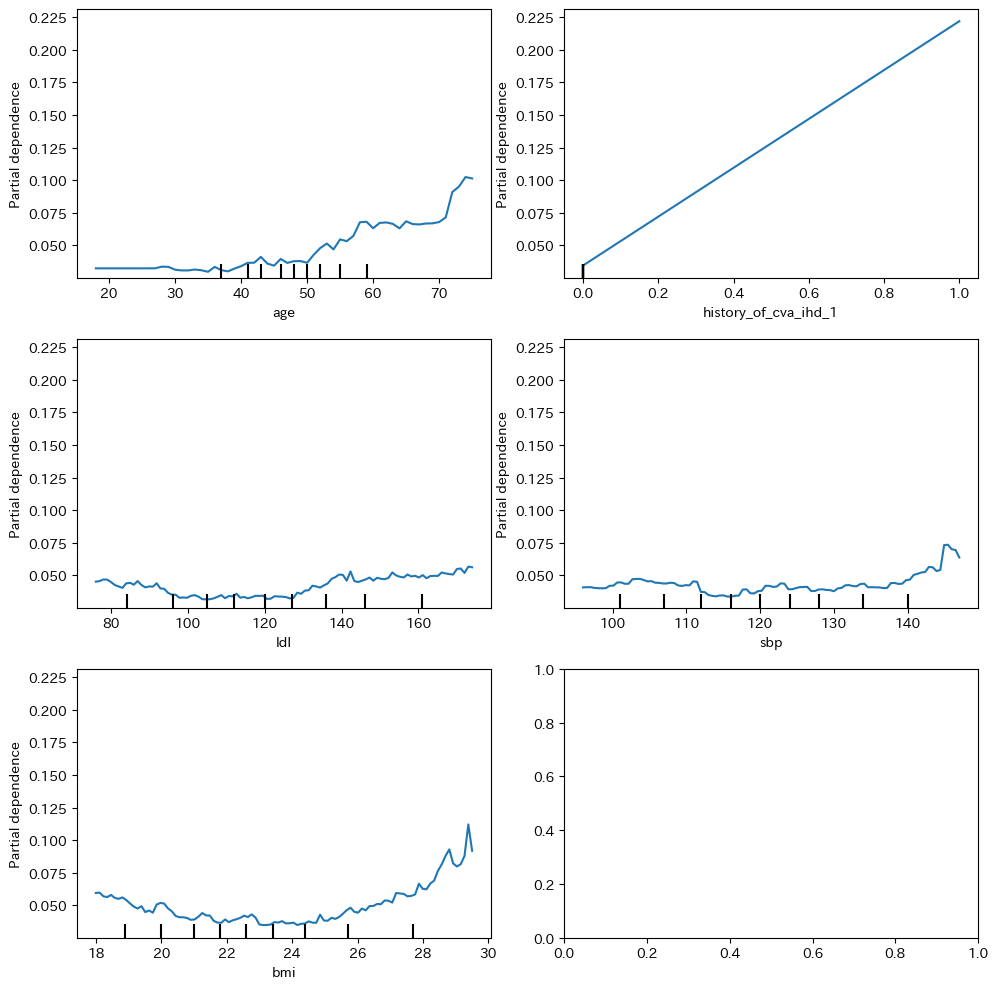

In [ ]:
print("\n" + "="*70)
print("SHAP値の算出および可視化".center(70))
print("="*70 + "\n")




# データの準備（df はすでに読み込まれていると仮定）
X = df[['age', 'bmi', 'ldl', 'hdl', 'sbp',  'a1c', 'sex', 'history_of_cva_ihd', 'take_medicine']]
y = df['outcome']

# カテゴリカル変数のダミー変数化
X = pd.get_dummies(X, columns=['sex', 'history_of_cva_ihd', 'take_medicine'], drop_first=True)

# ランダムフォレストモデルの構築
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# SHAP値の計算
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X)

print("Shape of shap_values:", np.array(shap_values).shape)

# SHAP値の形状に応じて処理を分岐
if len(np.array(shap_values).shape) == 3:
    # (10000, 10, 2)の場合、正のクラスのSHAP値を使用
    shap_values_class1 = shap_values[:, :, 1]
else:
    # 通常の二値分類の場合
    shap_values_class1 = shap_values[1]

print("Shape of shap_values_class1:", shap_values_class1.shape)

# SHAP値の可視化
try:
    # サマリープロット（棒グラフ）
    plt.figure(figsize=(10, 8))
    shap.summary_plot(shap_values_class1, X, plot_type="bar", show=False)
    plt.title("Feature Importance (SHAP values)")
    plt.tight_layout()
    plt.show()

    # ビースウォームプロット
    plt.figure(figsize=(10, 8))
    shap.summary_plot(shap_values_class1, X, show=False)
    plt.title("Feature Importance and Effects (SHAP values)")
    plt.tight_layout()
    plt.show()
except Exception as e:
    print(f"Error in summary plots: {e}")

# 特徴量の重要度を数値で表示
try:
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': np.abs(shap_values_class1).mean(0)
    })
    feature_importance = feature_importance.sort_values('importance', ascending=False)
    print(feature_importance)

    # 上位5つの特徴量を選択
    top_5_features = feature_importance['feature'].head(5).tolist()
except Exception as e:
    print(f"Error in feature importance calculation: {e}")

# 上位5つの重要な特徴量に対して部分依存プロットを作成
fig, ax = plt.subplots(3, 2, figsize=(10, 10))
PartialDependenceDisplay.from_estimator(rf, X, top_5_features, ax=ax.flatten()[:5])
plt.tight_layout()
plt.show()

# 以上の結果から、「age」「history_of_cva_ihd_1」「ldl」「sbp」「bmi」（降順）がOutcome_1に影響を及ぼす変数と判断することができた。

## 4章のロジスティック回帰およびランダムフォレストの結果から大血管病に影響を及ぼす変数を三つ挙げるとすると「age」「history_of_cva_ihd」「sbp」となる。4章の「age」のSHAP値部分的依存プロットを見ると40歳より年配の方が急激に発症リスクが増加することが推察された。また、「sbp」に関しては、閾値として140を超えると発症リスクが増加することが推察された。最後に興味深い結果として、「bmi」のSHAP値部分的依存プロットに注目すると、BMIが高いサンプル（肥満）の発症リスクは高いのに加え、BMIの低いサンプルも発症リスクが高い傾向が見受けられた。今回のデータ解析では、多変量ロジスティック回帰を実施したが、適合度が低く、説明性に欠けるモデルとなってしまった。原因として、非線形の特徴量や共変性を持っている可能性も考えられた。これらの情報に加え、一般的に喫煙や飲酒などの情報を加えるとより精度が高く、納得性の高いモデル構築をすることができるのではないかと考えた。


# 活用しなかった手法
ロジスティック回帰の係数を活用して、リスクスコアを算出。
データの解釈性を高め、施策につなげようと試みた。


In [ ]:
#リスクスコアを用いて、ロジスティック回帰の結果をよりわかりやすいように試みたが、そもそも、ロジスティック回帰の適合度が低い。そのため、レポートには使用せず。

# ロジスティック回帰の係数を使用してリスクスコアを作成
coefficients = results.params[1:]  # 切片を除外
max_score = 100  # 最大スコア

# 係数を正規化してスコアに変換
normalized_coef = coefficients / coefficients.abs().max()
risk_scores = (normalized_coef * max_score / 2).round().astype(int)

# リスクスコアの表示
risk_score_df = pd.DataFrame({
    'Feature': X.columns,
    'Risk Score': risk_scores
})
print(risk_score_df)

# リスクスコアの計算関数
def calculate_risk_score(patient_data):
    score = 0
    for feature, risk_score in risk_score_df.values:
        if feature in patient_data:
            score += risk_score * patient_data[feature]
    return score

# サンプルデータでリスクスコアを計算
sample_patient = {
    'age': 60,
    'bmi': 25,
    'ldl': 130,
    'hdl': 50,
    'sbp': 140,
    'dbp': 90,
    'a1c': 6.5,
    'sex_2.0': 1,
    'history_of_cva_ihd_1': 0,
    'take_medicine_1': 1
}

patient_score = calculate_risk_score(sample_patient)
print(f"Sample patient's risk score: {patient_score}")

                 Feature  Risk Score
x1                   age          50
x2                   bmi           8
x3                   ldl          13
x4                   hdl           1
x5                   sbp          29
x6                   a1c           2
x7               sex_2.0          -8
x8  history_of_cva_ihd_1          47
x9       take_medicine_1          24
Sample patient's risk score: 9029.0


## 決定木を採用し、非線形の特徴量や共変性に対応しようと試みたが、上手くいかなかった。
パラメータの調整などにより、上手くいく可能性はある。


                        決定木試してみたが、上手くいかなかった。没                         



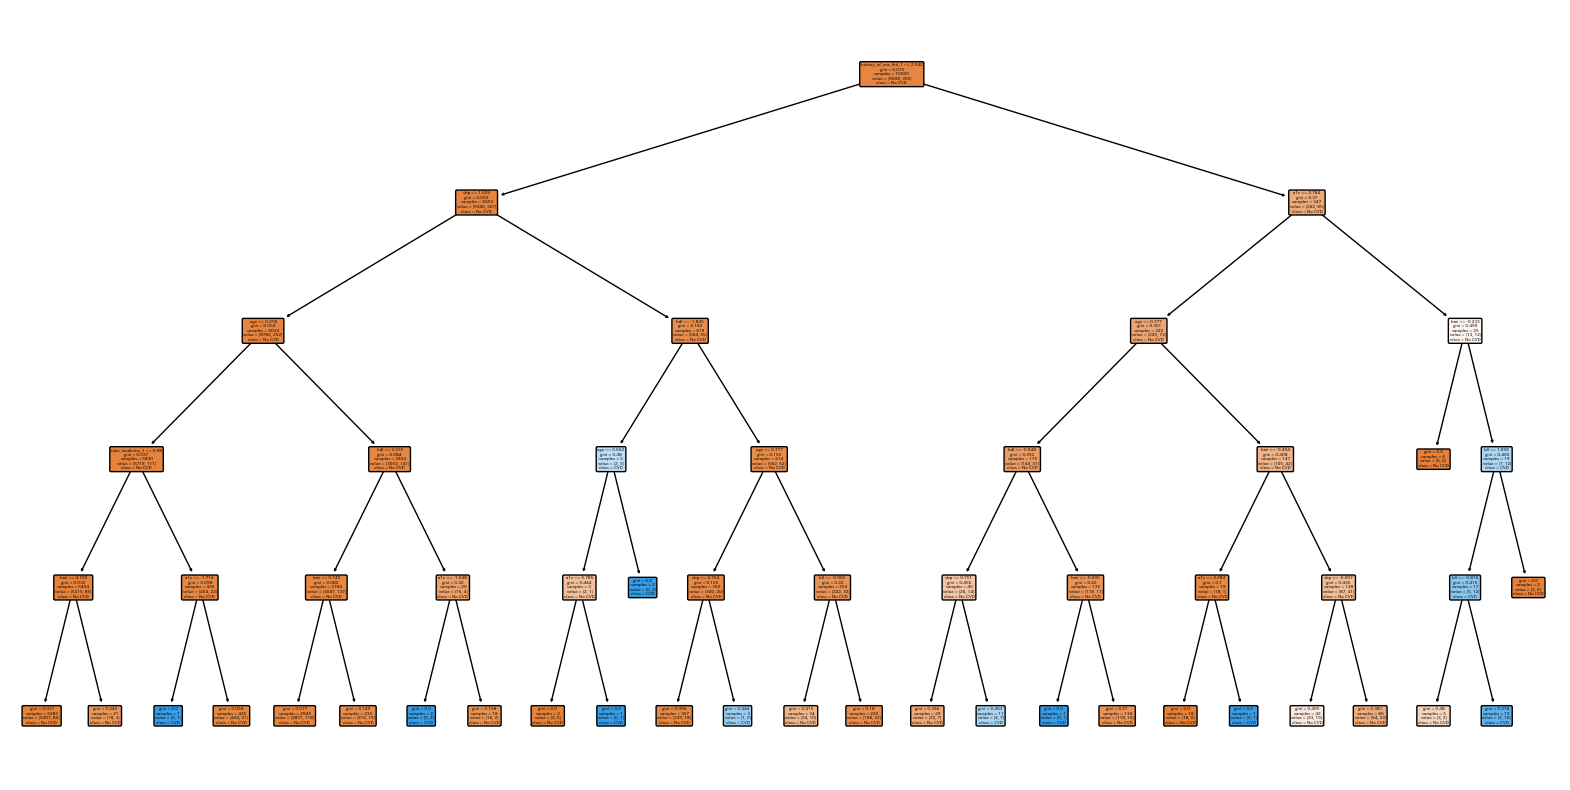

Feature: age, Score: 0.08596374424256227
Feature: bmi, Score: 0.10979573668430624
Feature: ldl, Score: 0.0653807295475859
Feature: hdl, Score: 0.08236286421058327
Feature: sbp, Score: 0.13785018309707717
Feature: a1c, Score: 0.13316618246205528
Feature: sex_2.0, Score: 0.0
Feature: history_of_cva_ihd_1, Score: 0.3734910227042038
Feature: take_medicine_1, Score: 0.011989537051625908


In [ ]:
print("\n" + "="*70)
print("決定木試してみたが、上手くいかなかった。没".center(70))
print("="*70 + "\n")



from sklearn.tree import DecisionTreeClassifier, plot_tree

# 決定木モデルの構築
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_scaled, y)

# 決定木の可視化
plt.figure(figsize=(20,10))
plot_tree(dt_model, feature_names=X.columns, class_names=['No CVD', 'CVD'], filled=True, rounded=True)
plt.show()

# 特徴量の重要度
importance = dt_model.feature_importances_
for i, v in enumerate(importance):
    print(f'Feature: {X.columns[i]}, Score: {v}')

# BMIを二次関数としてとらえる

In [ ]:
df['bmi_squared'] = (df['bmi'] - 20) ** 2

レポーティング用データ

In [ ]:
df[['age', 'bmi', 'ldl', 'hdl', 'sbp', 'dbp', 'a1c']].describe()

age           bmi           ldl           hdl           sbp  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean      47.723600     23.024510    121.581700     64.720300    120.615900   
std        8.723074      3.570038     30.144439     17.106161     15.825846   
min       18.000000     16.000000     33.000000     21.000000     78.000000   
25%       42.000000     20.500000    101.000000     52.000000    109.000000   
50%       48.000000     22.600000    120.000000     63.000000    120.000000   
75%       54.000000     25.000000    141.000000     75.000000    131.000000   
max       75.000000     39.700000    284.000000    165.000000    213.000000   

                dbp           a1c  
count  10000.000000  10000.000000  
mean      74.928100      5.578941  
std       11.556863      0.600192  
min       34.000000      4.300000  
25%       67.000000      5.300000  
50%       75.000000      5.500000  
75%       83.000000      5.700000  
max      138.000000     14.200000